In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from PIL import Image

In [3]:
def load_images(path):
  images = []
  names = []

  files = sorted(glob.glob(os.path.join(path, '*.png')))

  for file in files:
    img = np.array(Image.open(file)) / 255
    images.append(img.reshape(-1))
    names.append(os.path.basename(file))

  return np.array(images), names

horse_img, horse_names = load_images('/content/gdrive/MyDrive/Data/horses')
bird_img, bird_names = load_images('/content/gdrive/MyDrive/Data/birds')
comb_img = np.vstack((horse_img, bird_img))

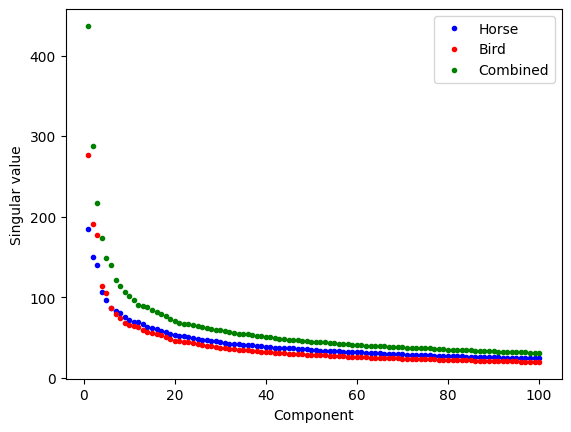

In [4]:
## 1-(a)
horse_pca = PCA().fit(horse_img)
bird_pca = PCA().fit(bird_img)
comb_pca = PCA().fit(comb_img)

plt.plot(range(1, 101), horse_pca.singular_values_[:100], 'b.')
plt.plot(range(1, 101), bird_pca.singular_values_[:100], 'r.')
plt.plot(range(1, 101), comb_pca.singular_values_[:100], 'g.')
plt.xlabel('Component')
plt.ylabel('Singular value')
plt.legend(['Horse', 'Bird', 'Combined'])
plt.show()

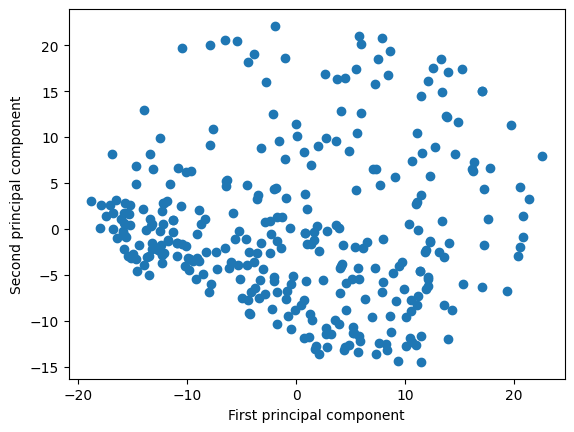

In [5]:
## 1-(b)
horse_2d = (horse_img - np.mean(horse_img, axis = 0)) @ horse_pca.components_[:2].T

plt.scatter(horse_2d[:, 0], horse_2d[:, 1])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()

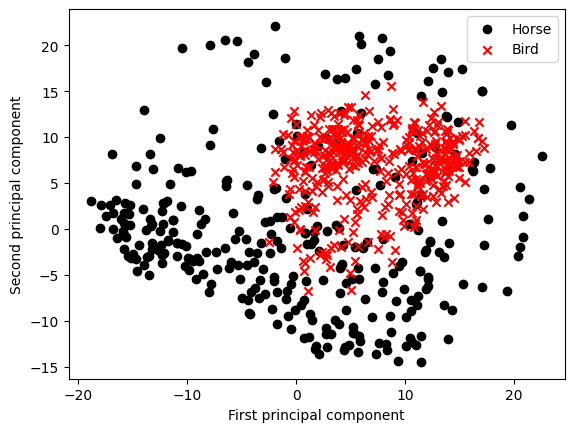

In [6]:
## 1-(c)
bird_2d = (bird_img - np.mean(horse_img, axis = 0)) @ horse_pca.components_[:2].T

plt.scatter(horse_2d[:, 0], horse_2d[:, 1], c = 'black')
plt.scatter(bird_2d[:, 0], bird_2d[:, 1], c = 'red', marker = 'x')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.legend(['Horse', 'Bird'])
plt.show()

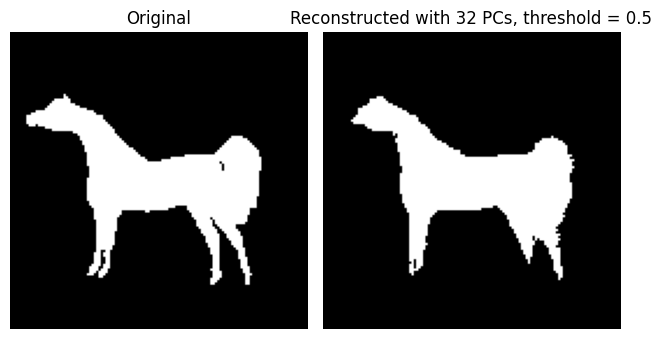

In [7]:
## 1-(d)
for i, name in enumerate(horse_names):
  if 'horse075.png' in name:
    idx = i
    break

img_1d = horse_img[idx]
img_len = int(np.sqrt(img_1d.shape[0]))
img = img_1d.reshape(img_len, img_len)
horse_pca = PCA(n_components = 32)
horse_pca.fit(horse_img)
horse_mean = np.mean(horse_img, axis = 0)
horse_recon = ((((img_1d - horse_mean) @ horse_pca.components_.T) @ horse_pca.components_ + horse_mean).reshape(img_len, img_len) > 0.5).astype(float)

plt.subplot(1, 2, 1)
plt.imshow(img, cmap = 'gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(horse_recon, cmap = 'gray')
plt.title('Reconstructed with 32 PCs, threshold = 0.5')
plt.axis('off')

plt.tight_layout()
plt.show()

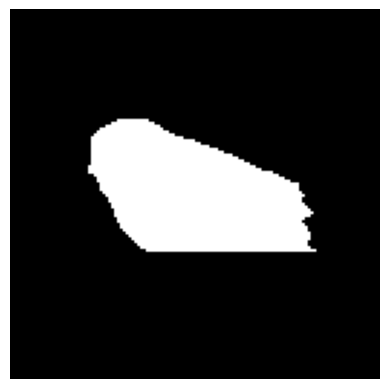

In [9]:
## 1-(e)
def pca_dist(x, mean, comp):
  recon = ((x - mean) @ comp.T) @ comp + mean
  dist = np.sqrt(np.sum((x - recon)**2, axis = 1))
  return dist

horse_pca.fit(horse_img)
dist = pca_dist(bird_img, horse_mean, horse_pca.components_)

img_len = int(np.sqrt(bird_img[np.argmin(dist)].shape[0]))
img = bird_img[np.argmin(dist)].reshape(img_len, img_len)

plt.imshow(img, cmap = 'gray')
plt.axis('off')
plt.show()

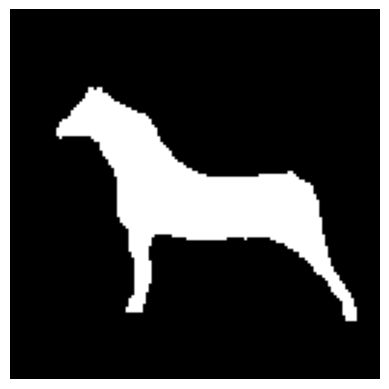

In [12]:
## 1-(f)
bird_pca = PCA(n_components = 32)
bird_pca.fit(bird_img)
bird_mean = np.mean(bird_img, axis = 0)

horse_dist = pca_dist(horse_img, bird_mean, bird_pca.components_)
bird_dist = pca_dist(bird_img, bird_mean, bird_pca.components_)

img_len = int(np.sqrt(horse_img[np.argmin(horse_dist)].shape[0]))
img = horse_img[np.argmin(horse_dist)].reshape(img_len, img_len)

plt.imshow(img, cmap = 'gray')
plt.axis('off')
plt.show()

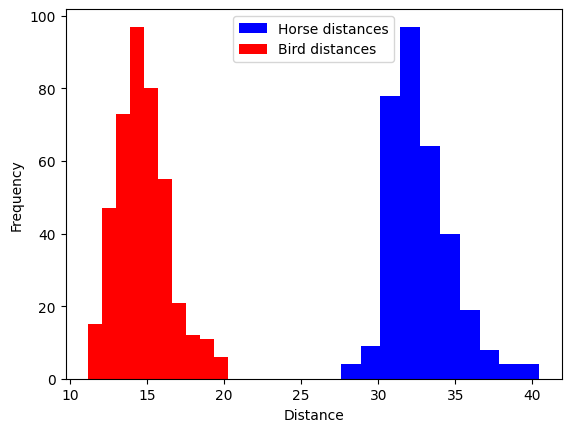

In [15]:
## 1-(g)

plt.hist(horse_dist, color = 'blue', label = 'Horse distances')
plt.hist(bird_dist, color = 'red', label = 'Bird distances')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.legend()
plt.show()